# Concept 


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

We present a generic framework to model wind power time series..


### ERA5 reanalysis data from ECMWF

Product type:Reanalysis

Variable:100m u-component of wind, 100m v-component of wind, 10m u-component of wind, 10m v-component of wind

Year:2021, 2022, 2023

Month:January, February, March, April, May, June, July, August, September, October, November, December

Day:01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31

Time:00:00, 01:00, 02:00, 03:00, 04:00, 05:00, 06:00, 07:00, 08:00, 09:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00

Sub-region extraction:North 55°, West 6°, South 47°, East 15°

Format:NetCDF (experimental)

In [7]:
f=xr.open_dataset('dataset_2012-2023_1000hPa.nc')


lons = f.variables['longitude'][:]  # longitude
lats = f.variables['latitude'][:]  # latitude
u100 = f.variables['u'][:,:,:] # u-wind at 100m height
v100 = f.variables['v'][:,:,:]  # v-wind at 100m height
#u10 = f.variables['u'][:,0,:,:]  # u-wind at 10m height
#v10 = f.variables['v10'][:,0,:,:]  # v-wind at 10m height
time = f.variables['time'][:]

ws100 = np.sqrt(u100*u100+v100*v100)

ValueError: operands could not be broadcast together with shapes (33,37,2) (33,37) 

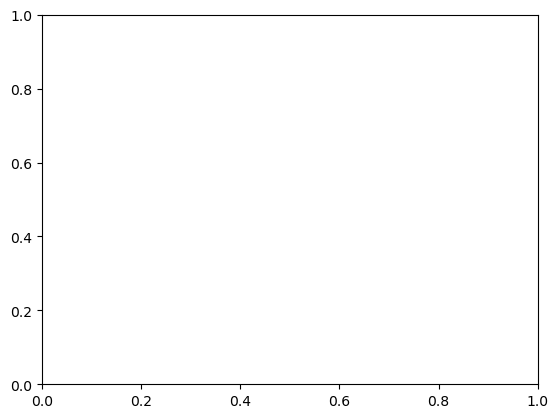

In [8]:
f=xr.open_dataset('dataset_2012-2023_1000hPa.nc')


lons = f.variables['longitude'][:]  # longitude
lats = f.variables['latitude'][:]  # latitude
u100 = f.variables['u'][:,:,:] # u-wind at 100m height
v100 = f.variables['v'][:,:,:]  # v-wind at 100m height
#u10 = f.variables['u'][:,0,:,:]  # u-wind at 10m height
#v10 = f.variables['v10'][:,0,:,:]  # v-wind at 10m height
time = f.variables['time'][:]

ws100 = np.sqrt(u100*u100+v100*v100)
#ws10 = np.sqrt(u10*u10+v10*v10)

m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

#oick location
loc1 = 15

x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])


cs = m.pcolor(xi,yi,np.squeeze(ws100[10,:,:]))

m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[10])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.show()


plt.figure(figsize=(15,5))
plt.plot(time[:],ws100[:,loc1,loc1])
sel_lon = np.array(lons[loc1])
sel_lat = np.array(lats[loc1])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.show()


[[-0.05620883+2.75507354j  0.75643263+0.8344315j   1.01370204-0.30690692j
  ...  1.54350326-1.07498937j  0.92655791+0.14607915j
  -0.09342932+1.81878126j]
 [-0.32389866-2.49585348j  1.7779841 -0.40603656j -2.17306165-0.51972418j
  ...  0.70991086+0.53087174j -1.30051805-0.33558691j
   2.06810306+1.35295663j]
 [ 1.36263896+2.27032853j -1.79776481+1.36860183j  0.14049712+2.29389921j
  ... -1.20148659+0.50555862j  0.57664621+2.74619854j
  -0.46865456+0.12206231j]
 ...
 [-0.46865456-0.12206231j  0.57664621-2.74619854j -1.20148659-0.50555862j
  ...  0.14049712-2.29389921j -1.79776481-1.36860183j
   1.36263896-2.27032853j]
 [ 2.06810306-1.35295663j -1.30051805+0.33558691j  0.70991086-0.53087174j
  ... -2.17306165+0.51972418j  1.7779841 +0.40603656j
  -0.32389866+2.49585348j]
 [-0.09342932-1.81878126j  0.92655791-0.14607915j  1.54350326+1.07498937j
  ...  1.01370204+0.30690692j  0.75643263-0.8344315j
  -0.05620883-2.75507354j]]


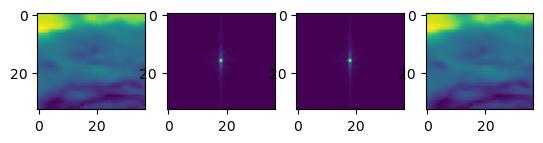

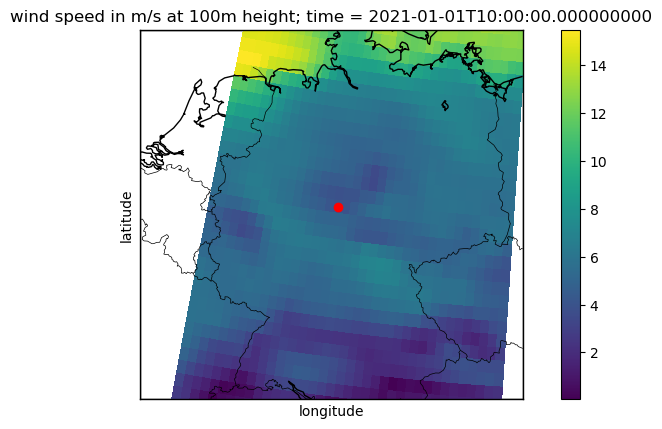

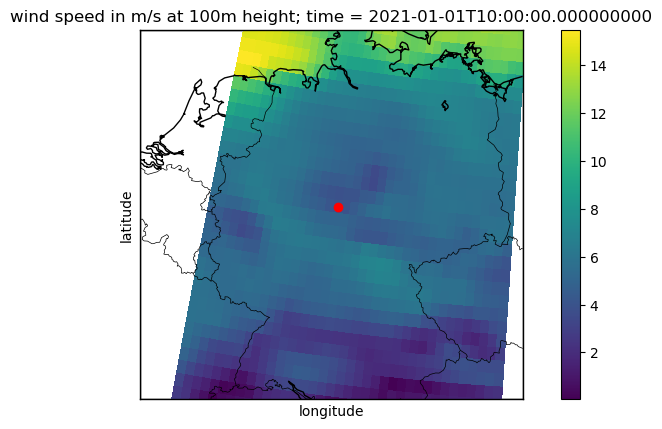

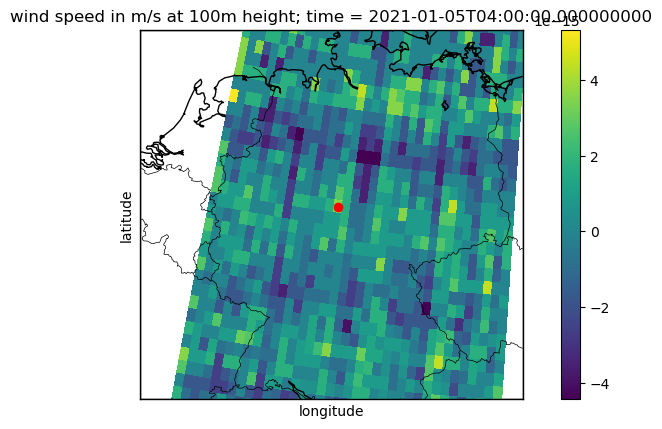

In [46]:
#2D fourier filter
timepoint = 100
grating = np.array(ws100[timepoint,:,:])

# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(141)
plt.imshow(grating)
# Calculate Fourier transform of grating
ft = np.fft.ifftshift(grating)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

plt.subplot(142)
plt.imshow(abs(ft))


peak_freq = 1./1000000
filtered_ft = ft.copy()
filtered_ft[np.abs(filtered_ft) < peak_freq] = 0

print(filtered_ft)

plt.subplot(143)
plt.imshow(abs(filtered_ft))

# Calculate the inverse Fourier transform of 
# the Fourier transform
ift = np.fft.ifftshift(filtered_ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)
ift = ift.real  # Take only the real part

plt.subplot(144)
plt.imshow(ift)
plt.show()


m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
#oick location
loc1 = 15
x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])
cs = m.pcolor(xi,yi,np.squeeze(grating))
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[10])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.show()

m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
#oick location
loc1 = 15
x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])
cs = m.pcolor(xi,yi,np.squeeze(ift))
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[10])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.show()


m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
#oick location
loc1 = 15
x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])
cs = m.pcolor(xi,yi,np.squeeze(grating -ift))
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[timepoint])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.show()

### Split wind speed data: v = v_g + v'

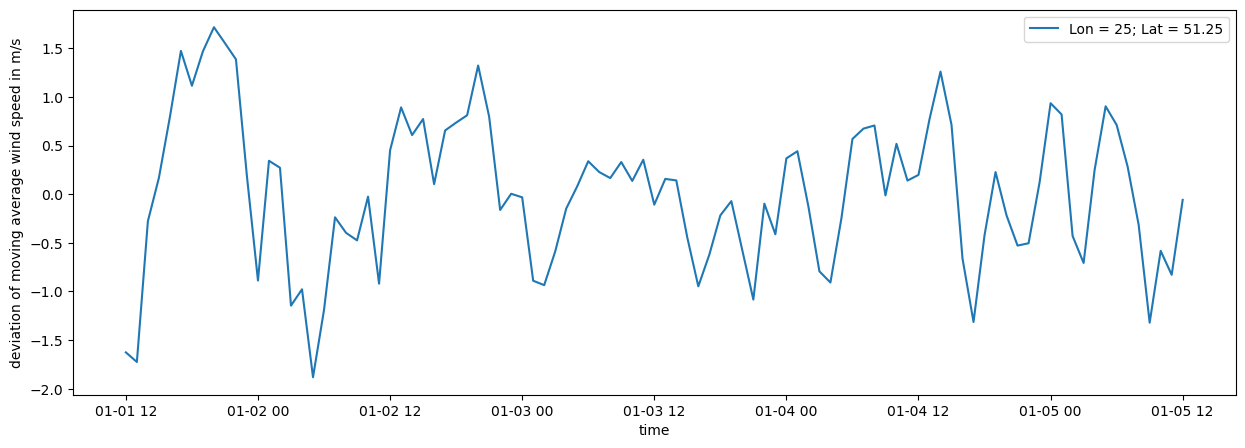

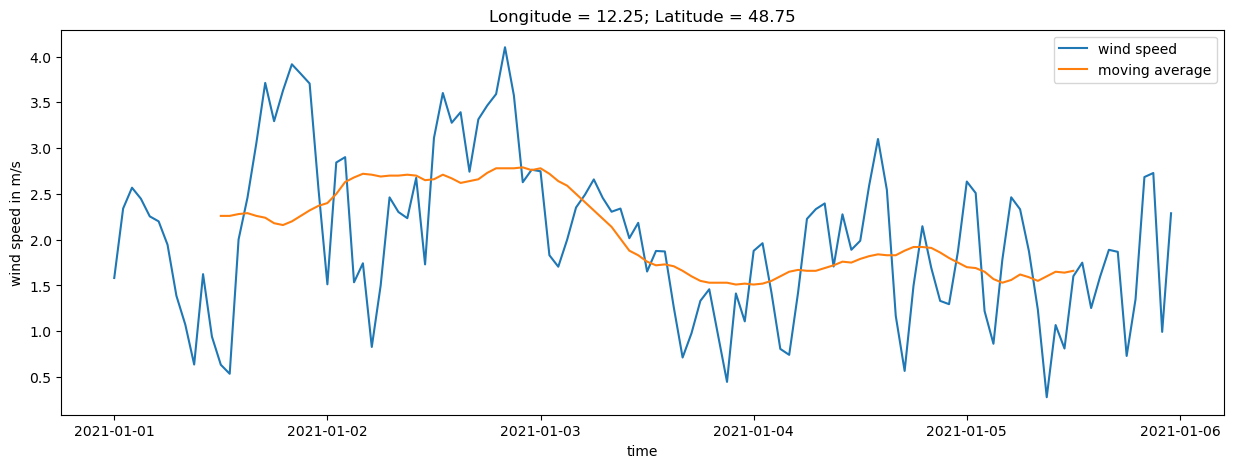

97


In [69]:
plt.figure(figsize=(15,5))
for loc1 in range(25,26):

  t = np.array(time[0:int(24*5)])
  v = np.array(ws100[0:int(24*5),loc1,loc1])

  # moving average over 12h
  window_size = 12
  
  i = window_size 
  v_ma = [] 
  t_ma = []
  v_dev = []
  while i < len(v) - window_size + 1: 
    xx = round(np.sum(v[i-window_size:i+window_size]) / (2*window_size), 2) 
    v_ma.append(xx) 
    t_ma.append(t[i])
    v_dev.append(v[i] - xx) 
      
    i += 1

  plt.plot(t_ma,v_dev,label='Lon = '+str(loc1)+'; Lat = '+str(sel_lat) )
#plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('deviation of moving average wind speed in m/s')
plt.xlabel('time')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t,v, label = 'wind speed')
plt.plot(t_ma,v_ma, label = 'moving average')
plt.title('Longitude = '+str(np.array(lons[loc1]))+'; Latitude = '+str(np.array(lats[loc1])))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.legend()
plt.show()

print(len(t_ma))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


97


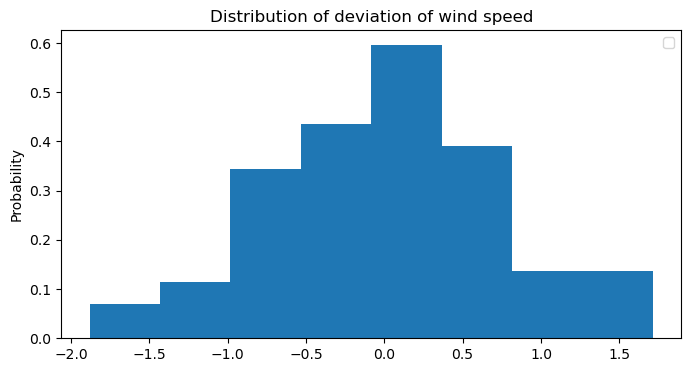

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(v_dev, bins='auto', density=True)
#ax.hist(data, bins=30, density=True, alpha=0.6) 
ax.set_ylabel('Probability')
ax.set_title('Distribution of deviation of wind speed')
ax.legend();


print(len(v_dev))



In [71]:
from ouparams import ouparams
ds = np.array(v_dev)
theta, sigma, kappa = ouparams.find(ds)

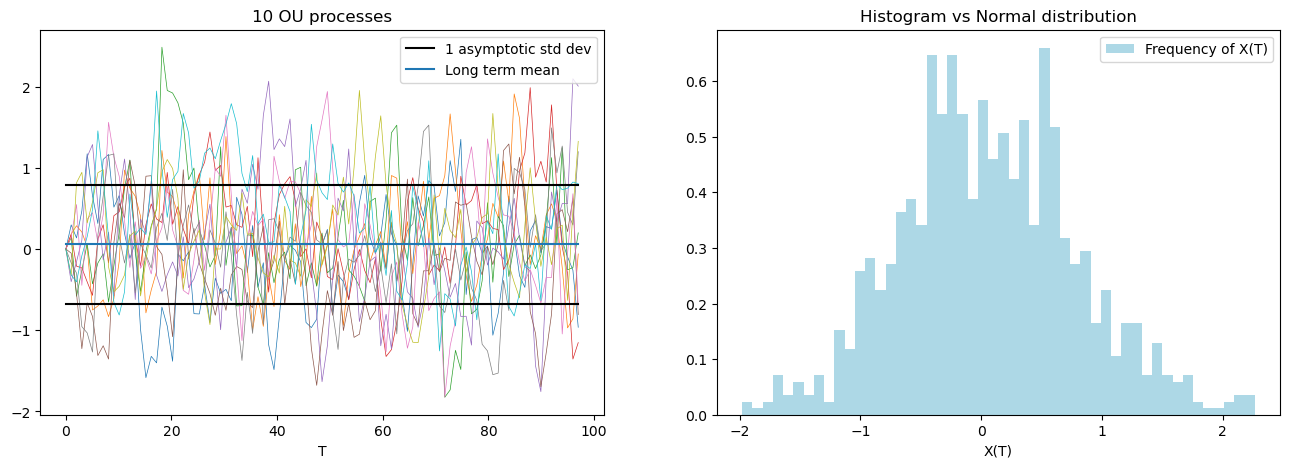

In [72]:
import scipy.stats as ss
np.random.seed(seed=42)

N = 97  # time steps
paths = 1000  # number of paths
Tt = 97
T_vec, dt = np.linspace(0, Tt, N, retstep=True)


std_asy = np.sqrt(sigma**2 / (2 * kappa))  # asymptotic standard deviation

X0 = 0
X = np.zeros((paths, N))
X[:, 0] = X0
W = ss.norm.rvs(loc=0, scale=1, size=(paths, N - 1))

# Uncomment for Euler Maruyama
# for t in range(0,N-1):
#    X[:,t+1] = X[:,t] + kappa*(theta - X[:,t])*dt + sigma * np.sqrt(dt) * W[:,t]

std_dt = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
for t in range(0, N - 1):
    X[:, t + 1] = theta + np.exp(-kappa * dt) * (X[:, t] - theta) + std_dt * W[:, t]

X_T = X[:, -1]  # values of X at time T
X_1 = X[1, :]  # a single path

mean_T = theta + np.exp(-kappa * Tt) * (X0 - theta)
std_T = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * Tt)))


N_processes = 10  # number of processes
x = np.linspace(X_T.min(), X_T.max(), 100)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(T_vec, X[:N_processes, :].T, linewidth=0.5)
ax1.plot(T_vec, (theta + std_asy) * np.ones_like(T_vec), label="1 asymptotic std dev", color="black")
ax1.plot(T_vec, (theta - std_asy) * np.ones_like(T_vec), color="black")
ax1.plot(T_vec, theta * np.ones_like(T_vec), label="Long term mean")
ax1.legend(loc="upper right")
ax1.set_title(f"{N_processes} OU processes")
ax1.set_xlabel("T")
ax2.hist(X_T, density=True, bins=50, facecolor="LightBlue", label="Frequency of X(T)")
ax2.legend()
ax2.set_title("Histogram vs Normal distribution")
ax2.set_xlabel("X(T)")
plt.show()

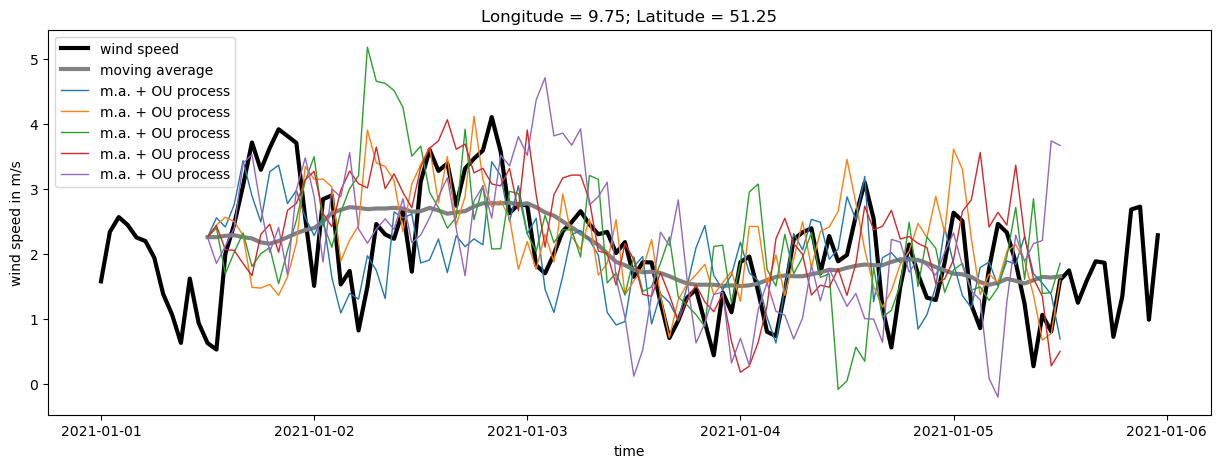

In [73]:
t = np.array(time[0:24*5])

plt.figure(figsize=(15,5))
plt.plot(t,v, label = 'wind speed',color = 'black',linewidth = 3)
plt.plot(t_ma,v_ma, label = 'moving average',color = 'grey',linewidth = 3)
for i in range(0,int(N_processes/2)):
    plt.plot(t_ma,v_ma + X[i, :],label='m.a. + OU process',linewidth = 1)
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.legend()
plt.show()

## Split data: v = v_f + v'


<Figure size 1500x500 with 0 Axes>

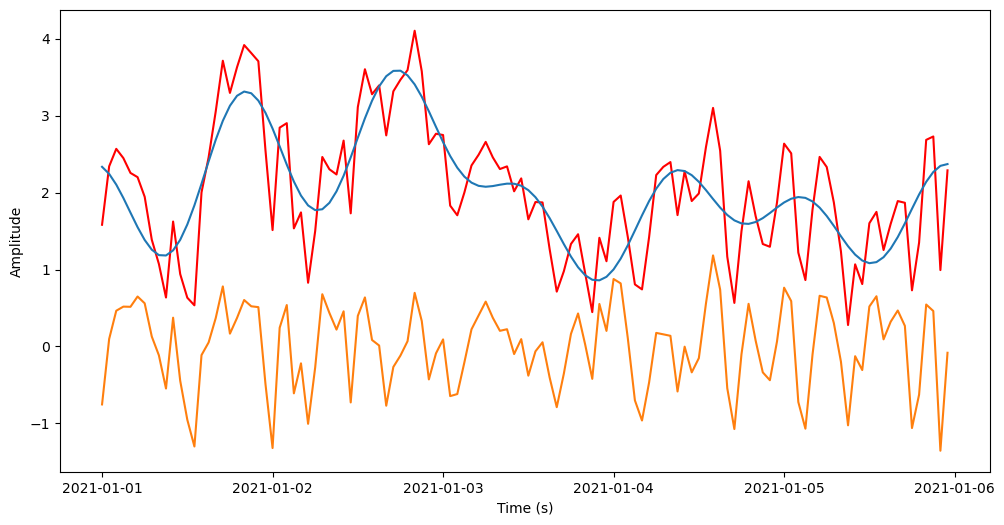

In [77]:
loc1 = 25
plt.figure(figsize=(15,5))
t = np.array(time[0:int(24*5)])
v = np.array(ws100[0:int(24*5),loc1,loc1])

from scipy.fftpack import fftfreq
from numpy.fft import fft, ifft
  

# FFT the signal
sig_fft = fft(v)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(v), d=1./(24*5))

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) > cut_off] = 0


# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)



# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, v, 'r')
plt.plot(t, filtered)
plt.plot(t,v-filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()





No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


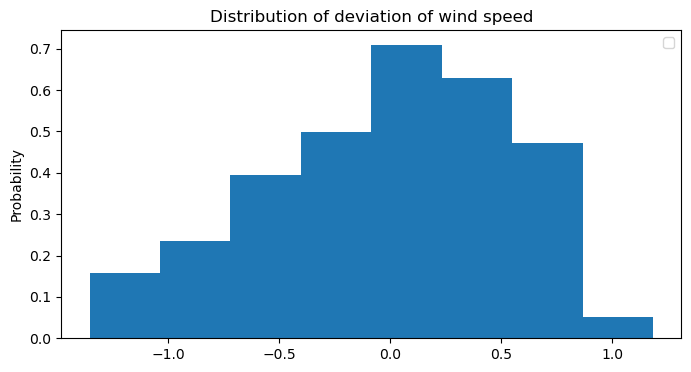

In [78]:
v_dev = (v - filtered).real


fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(v_dev, bins='auto', density=True)
#ax.hist(data, bins=30, density=True, alpha=0.6) 
ax.set_ylabel('Probability')
ax.set_title('Distribution of deviation of wind speed')
ax.legend();

from ouparams import ouparams
ds = np.array(v_dev)
theta, sigma, kappa = ouparams.find(ds)

import scipy.stats as ss
np.random.seed(seed=42)

N = len(filtered.real)  # time steps
paths = 1000  # number of paths
Tt = len(filtered.real)
T_vec, dt = np.linspace(0, Tt, N, retstep=True)


std_asy = np.sqrt(sigma**2 / (2 * kappa))  # asymptotic standard deviation

X0 = 0
X = np.zeros((paths, N))
X[:, 0] = X0
W = ss.norm.rvs(loc=0, scale=1, size=(paths, N - 1))

# Uncomment for Euler Maruyama
# for t in range(0,N-1):
#    X[:,t+1] = X[:,t] + kappa*(theta - X[:,t])*dt + sigma * np.sqrt(dt) * W[:,t]

std_dt = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * dt)))
for t in range(0, N - 1):
    X[:, t + 1] = theta + np.exp(-kappa * dt) * (X[:, t] - theta) + std_dt * W[:, t]

X_T = X[:, -1]  # values of X at time T
X_1 = X[1, :]  # a single path

mean_T = theta + np.exp(-kappa * Tt) * (X0 - theta)
std_T = np.sqrt(sigma**2 / (2 * kappa) * (1 - np.exp(-2 * kappa * Tt)))


N_processes = 10  # number of processes
x = np.linspace(X_T.min(), X_T.max(), 100)



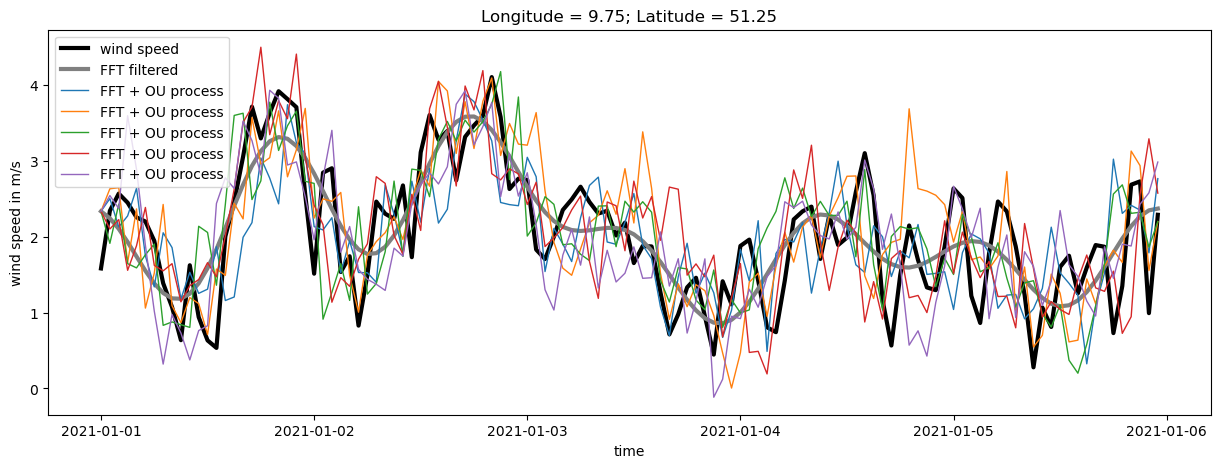

In [79]:

t = np.array(time[0:24*5])

plt.figure(figsize=(15,5))
plt.plot(t,v, label = 'wind speed',color = 'black',linewidth = 3)
plt.plot(t,filtered.real, label = 'FFT filtered',color = 'grey',linewidth = 3)
for i in range(0,int(N_processes/2)):
    plt.plot(t,filtered.real + X[i, :],label='FFT + OU process',linewidth = 1)
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.legend()
plt.show()

# Ensemble forecast ECMWF

In [9]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [14]:
client = Client(source="ecmwf")

client.retrieve(
    time=0,
    stream="enfo",
    type=['pf'],
    param=['u','v'],
    step=[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,78,81,84,87,90],
    levelist = 925,
    target="data.grib3",
)

<multiple>:   0%|          | 0.00/882M [00:00<?, ?B/s]

In [54]:
import xarray
import matplotlib.pyplot as plt
import numpy as np

data = xarray.open_dataset('data.grib2', engine='cfgrib')
data_cf = xarray.open_dataset('data.grib', engine='cfgrib')

print(data)
#data.to_netcdf('netcdf_file.nc')

lons_ecmwf = np.array(data.variables['longitude'][:])  # longitude 900
lats_ecmwf = np.array(data.variables['latitude'][:])  # latitude 451
time_ecmwf = np.array(data.variables['step'])
u_ecmwf = np.array(data.variables['u']) #4, lons, lats
v_ecmwf = np.array(data.variables['v']) #4, lons, lats

u_ecmwf_cf = np.array(data_cf.variables['u']) #4, lons, lats
v_ecmwf_cf = np.array(data_cf.variables['v']) #4, lons, lats
#ws_ecmwf = np.array(np.sqrt(u_ecmwf*u_ecmwf+v_ecmwf*v_ecmwf))


print(data.variables['valid_time'])

Ignoring index file 'data.grib2.923a8.idx' older than GRIB file


<xarray.Dataset>
Dimensions:        (number: 50, step: 11, latitude: 451, longitude: 900)
Coordinates:
  * number         (number) int32 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
    time           datetime64[ns] ...
  * step           (step) timedelta64[ns] 00:00:00 03:00:00 ... 1 days 06:00:00
    isobaricInhPa  float64 ...
  * latitude       (latitude) float64 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * longitude      (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time     (step) datetime64[ns] ...
Data variables:
    v              (number, step, latitude, longitude) float32 ...
    u              (number, step, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history: 

In [5]:
print(np.array(data.variables['valid_time']))

['2023-12-25T00:00:00.000000000' '2023-12-25T03:00:00.000000000'
 '2023-12-25T06:00:00.000000000' '2023-12-25T09:00:00.000000000'
 '2023-12-25T12:00:00.000000000' '2023-12-25T15:00:00.000000000'
 '2023-12-25T18:00:00.000000000' '2023-12-25T21:00:00.000000000'
 '2023-12-26T00:00:00.000000000' '2023-12-26T03:00:00.000000000'
 '2023-12-26T06:00:00.000000000']


In [112]:
print(lons_ecmwf[468])
print(lats_ecmwf[94])

7.200000000001485
52.39999999999968


In [32]:
ws = np.array(np.sqrt(u_ecmwf*u_ecmwf+v_ecmwf*v_ecmwf))

ws_cf =  np.array(np.sqrt(u_ecmwf_cf*u_ecmwf_cf+v_ecmwf_cf*v_ecmwf_cf))

from scipy import interpolate
wind_speed = np.linspace(0,25,51)
performance = np.array([0, 0, 0, 0, 3, 10, 25, 49, 82, 123, 174, 240, 321, 418, 532, 664, 815, 988, 1180, 1384, 1580, 1749, 1890, 2005, 2100, 2180, 2250, 2311, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350, 2350])
 
interp_perf = interpolate.UnivariateSpline(wind_speed, performance, s=0)
def convert_wind_to_performance(ws):
    return interp_perf(ws)




[              0  10800000000000  21600000000000  32400000000000
  43200000000000  54000000000000  64800000000000  75600000000000
  86400000000000  97200000000000 108000000000000]


(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

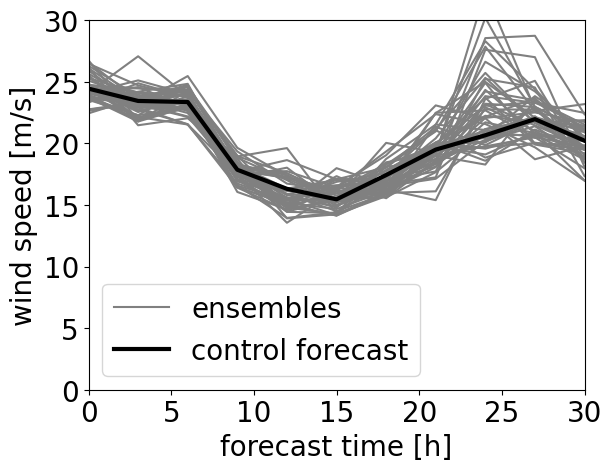

In [45]:
#print(len(ws[1,:,50,50]))
print(time_ecmwf)
step=[0,3,6,9,12,15,18,21,24,27,30]#,33,36,39,42,45,48,51,54,57,60,63,66,69,72,78,81,84,87,90]
step = np.array(step)

lat_index1 = int(451/4 -5) # 47.2 grad > 107
lat_index2 = int(451/4 -25) #55.2 grad > 87
lon_index1 = int(900/2+15) # 6grad > 465
lon_index2 = int(900/2+38) # 15.2grad > 488

ws_ger = ws[:,:,87:107,465:488]
ws_ger_cf = ws_cf[:,87:107,465:488]



wp_ger = convert_wind_to_performance(ws_ger)
wp_ger_cf = convert_wind_to_performance(ws_ger_cf)

ws_mean = np.mean(ws_ger,axis = (2,3))
ws_cf_mean = np.mean(ws_ger_cf,axis = (1,2))

xx = 2
for i in range(0,49): 
    plt.plot(step,ws[i,0:30,94,468],color='grey')
plt.plot(step,ws[49,0:30,94,468],color='grey',label = 'ensembles')
plt.plot(step,ws_cf[0:30,94,468],color='black',linewidth = '3',label = 'control forecast')
plt.xlabel('forecast time [h]',size=20)
plt.ylabel('wind speed [m/s]',size=20)
#plt.title('Christmas 2023',size=20)
plt.ylim([0,30])
plt.xlim([0,30])
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


(4, 100)


{'bodies': [<matplotlib.collections.PolyCollection at 0x1cef4192670>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1cef41925e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1cef41aa6a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1cef41aaa90>}

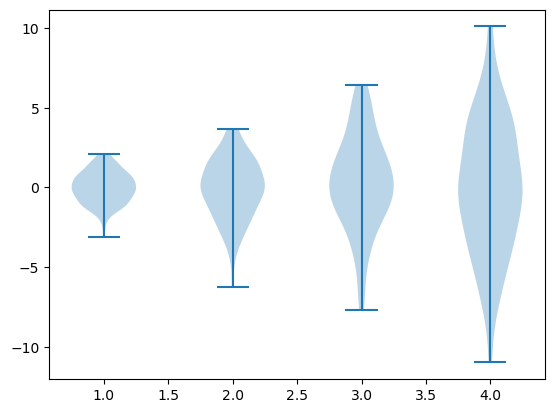

In [14]:
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

print(np.shape(data))
plt.violinplot(data)

[[[ 9.205143    9.112887    9.071489   ...  8.364402    7.984094
    7.642229  ]
  [ 9.517444    9.3882265   9.28428    ...  8.300476    7.906915
    7.5389247 ]
  [ 9.965678    9.812309    9.615565   ...  8.110103    7.6562715
    7.1694245 ]
  ...
  [ 3.3602154   3.2731552   3.2686858  ...  1.0407048   0.84154177
    0.5539943 ]
  [ 3.257956    3.200339    3.0236487  ...  0.8951459   1.0790251
    1.0779116 ]
  [ 2.8235126   2.6269243   2.3865619  ...  0.7247255   1.0399975
    1.3415747 ]]

 [[10.54115    10.304861   10.014737   ...  8.702614    8.242794
    7.7938924 ]
  [11.04068    10.861573   10.501436   ...  8.81585     8.343879
    7.826096  ]
  [11.607791   11.535241   11.165502   ...  8.643271    8.1434145
    7.5359173 ]
  ...
  [ 3.523604    3.3420477   3.2509992  ...  1.0682285   0.84648895
    0.5592244 ]
  [ 3.4119747   3.248493    3.0030239  ...  0.9144973   1.1182313
    1.0937926 ]
  [ 2.946015    2.7070587   2.4436555  ...  0.6619326   1.061256
    1.3866563 ]]

 [[

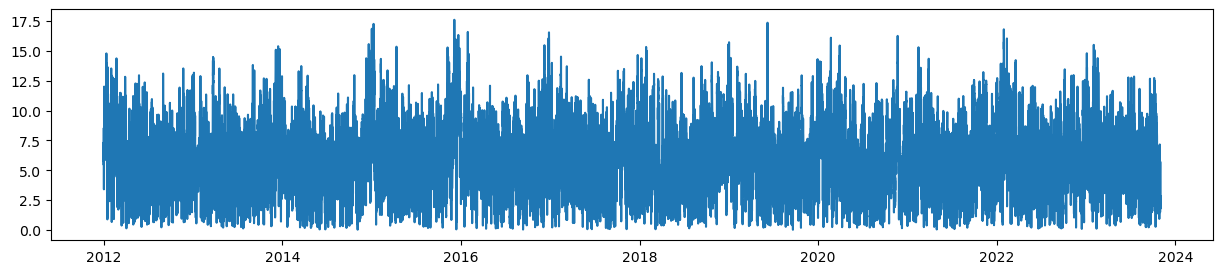

In [35]:
#f1=xr.open_dataset('dataset_2012-2014.nc')
#f2=xr.open_dataset('dataset_2015-2017.nc')
#f3=xr.open_dataset('dataset_2018-2020.nc')
#f4=xr.open_dataset('dataset_2021-2023.nc')

#f = xr.concat([f4, f3, f2, f1], dim='time')

f = xr.open_dataset('dataset_2012-2023_1000hPa.nc')



lons = f.variables['longitude'][:]  # longitude
lats = f.variables['latitude'][:]  # latitude
u100 = f.variables['u'][:,:,:,0] # u-wind at 100m height
v100 = f.variables['v'][:,:,:,0]  # v-wind at 100m height
#u10 = f.variables['u10'][:,0,:,:]  # u-wind at 10m height
#v10 = f.variables['v10'][:,0,:,:]  # v-wind at 10m height
time = f.variables['time'][:]


ws100_data = np.array(np.sqrt(u100*u100+v100*v100))


nan_idx = np.argwhere(~np.isnan(ws100_data[:,0,0])).T[0]
ws100 = ws100_data[nan_idx,:,:]
time_vec = time[nan_idx]

plt.figure(figsize = (15,3))
plt.plot(time_vec, ws100[:,10,5])

print(ws100)


In [36]:
print(lons[5])
print(lats[10])

<xarray.Variable ()>
array(7.25, dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude
<xarray.Variable ()>
array(52.5, dtype=float32)
Attributes:
    units:      degrees_north
    long_name:  latitude


7.072701
3.2993176


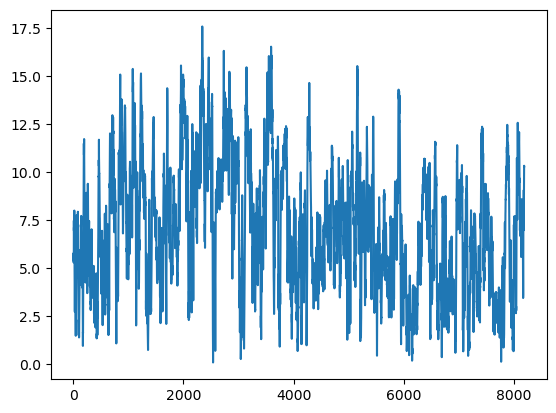

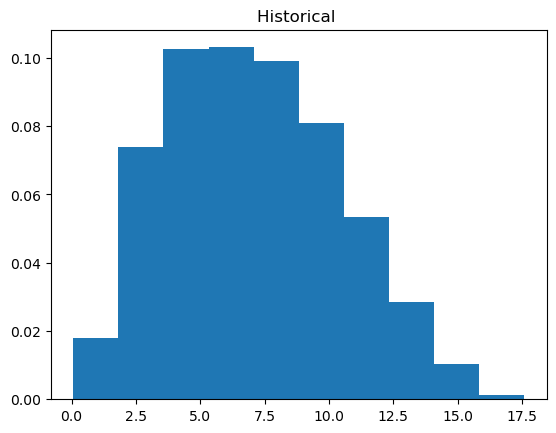

In [37]:
import pandas as pd
month_vec = pd.to_datetime(time_vec).month

dec_ind = np.where(month_vec == 12)

dec_ws100 = ws100[dec_ind,:,:]

plt.figure(0)
plt.plot(dec_ws100[0,:,10,5])


plt.figure(1)
plt.hist(dec_ws100[0,:,10,5],density=True)
plt.title('Historical ')

print(np.mean(dec_ws100[0,:,10,5]))
print(np.std(dec_ws100[0,:,10,5]))

Text(0, 0.5, 'wind speed [m/s]')

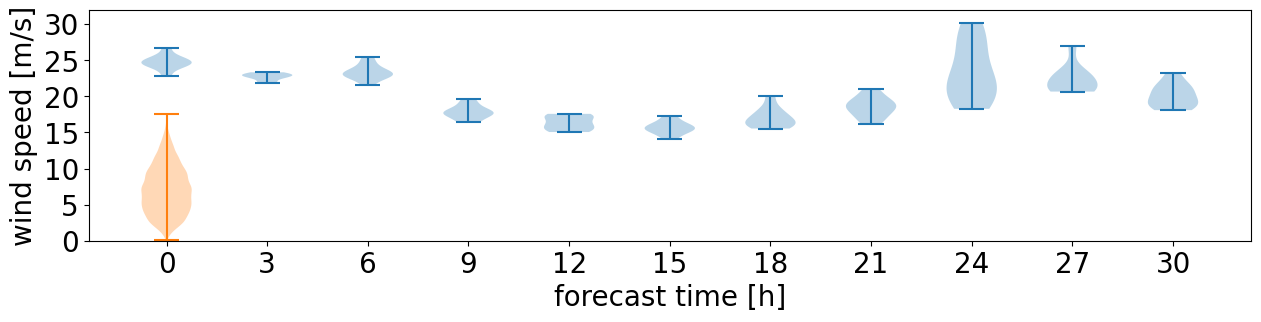

In [57]:
import matplotlib.pyplot as plt
import numpy as np

ws_sel = ws[0:10,:,94,468]

pos = [3,6,9,12,15,18,21,24,27,30]
plt.figure(figsize=[15,3])
plt.violinplot(ws_sel[:,:])#,color = 'grey')
plt.violinplot(dec_ws100[0,:,10,5])
plt.xticks([1, 2,3,4,5,6,7,8,9,10,11], ['0','3','6','9','12','15','18','21','24','27','30'],fontsize = 20)
plt.yticks(fontsize = 20)
#plt.xlim([.5,10.5])
plt.ylim([0,32])
plt.xlabel('forecast time [h]',size=20)
plt.ylabel('wind speed [m/s]',size=20)


#plt.xticks([3,6,9,12,15,18,21,24,27,30])
#plt.violinplot(dec_ws100[0,:,10,5])


C:\Users\Anwender\AppData\Local\Temp\ipykernel_19148\333649524.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(nPCAc+1)


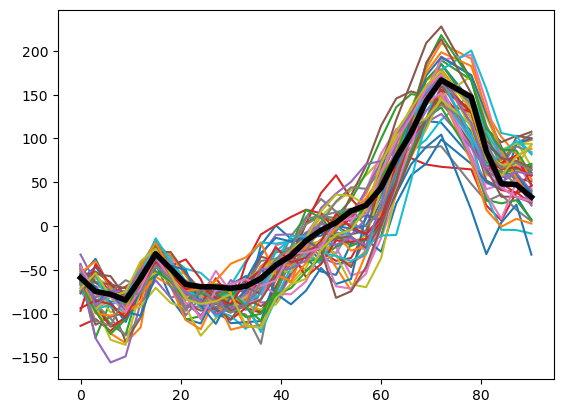

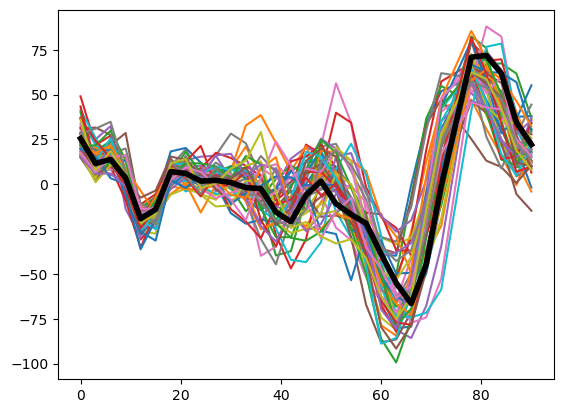

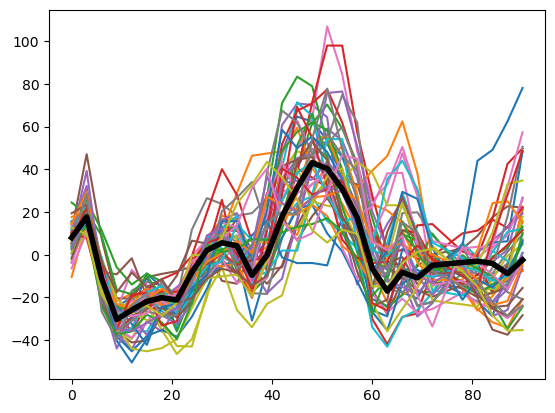

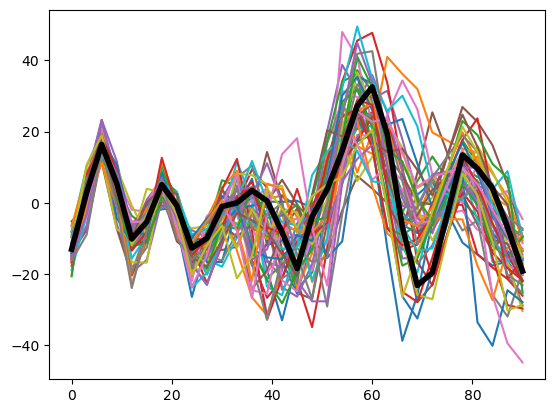

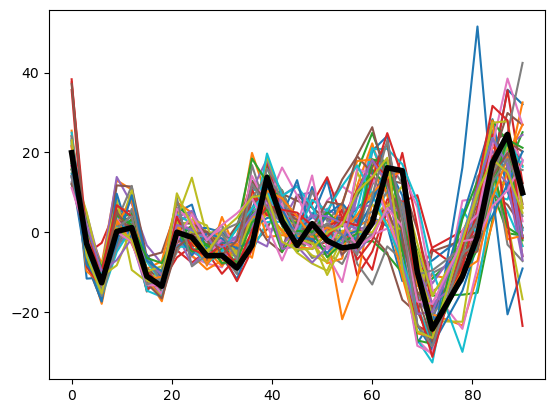

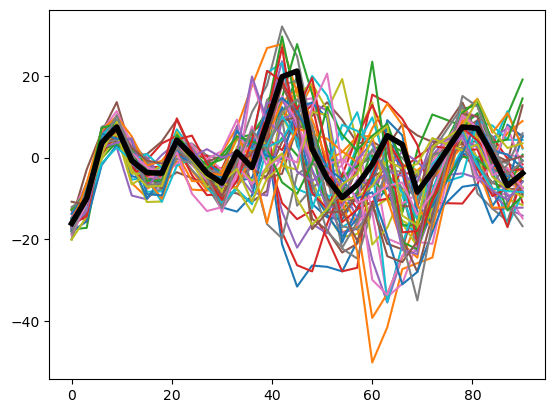

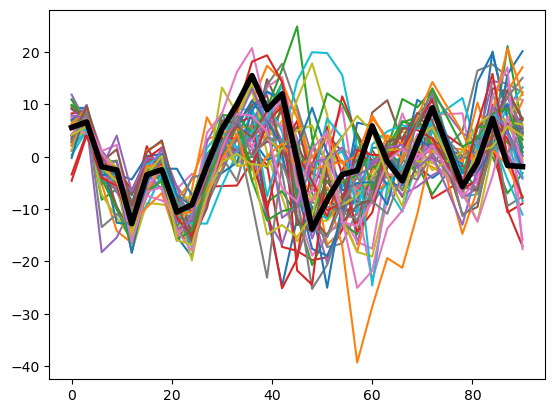

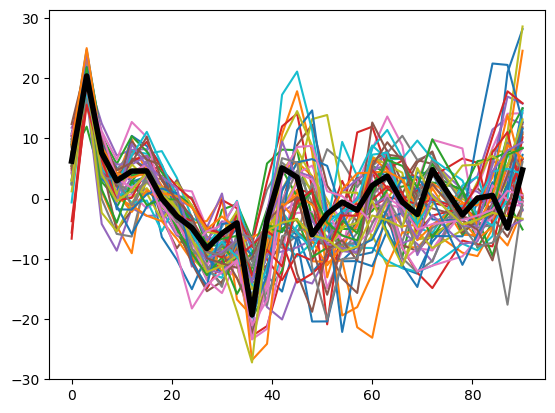

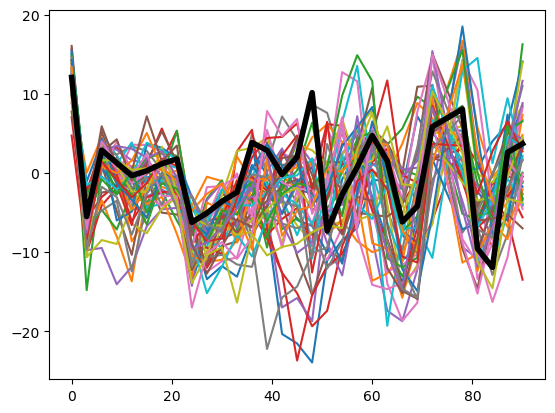

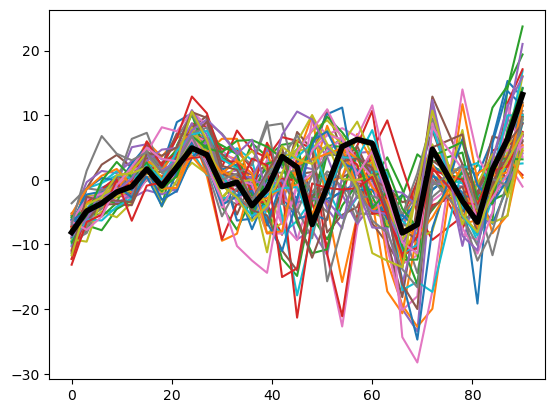

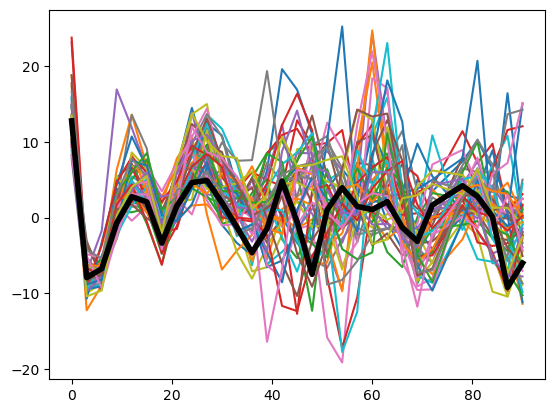

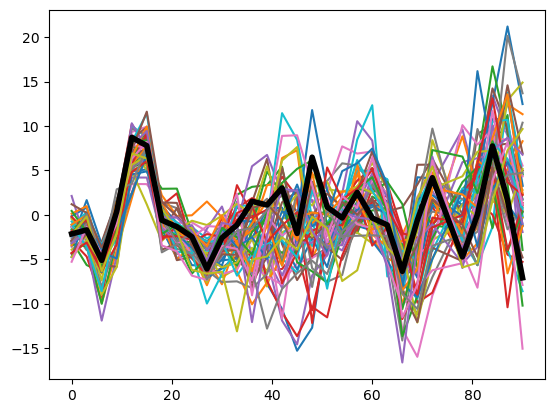

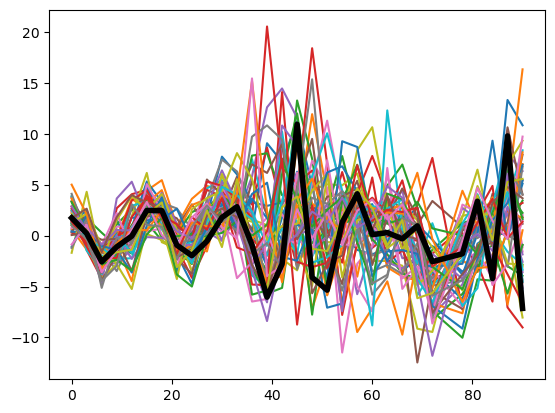

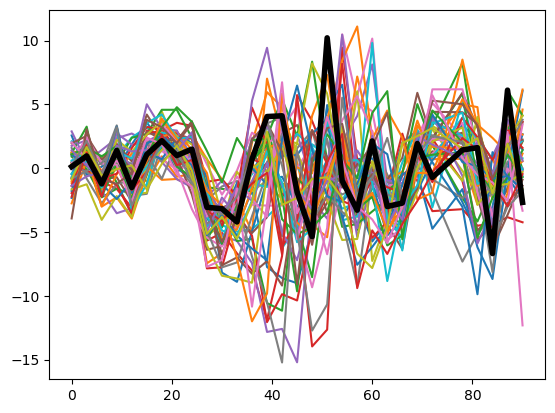

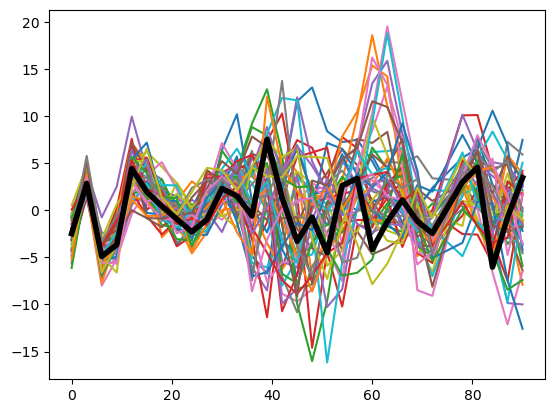

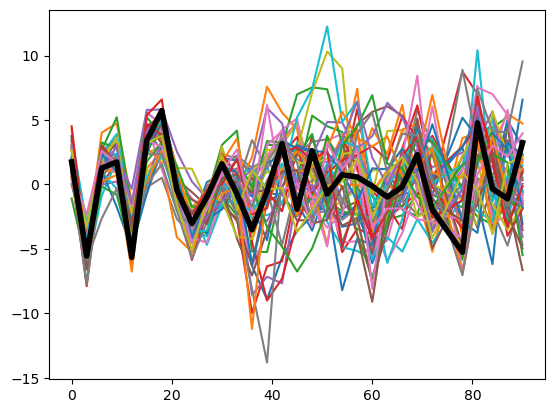

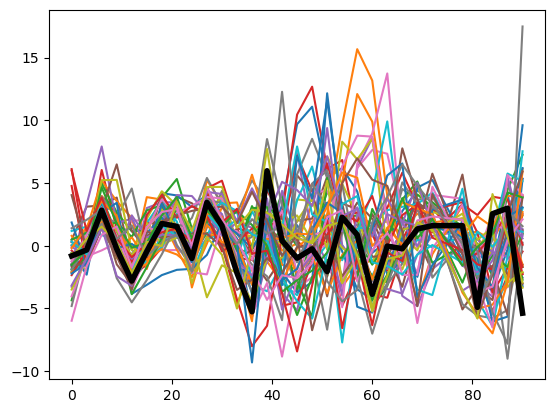

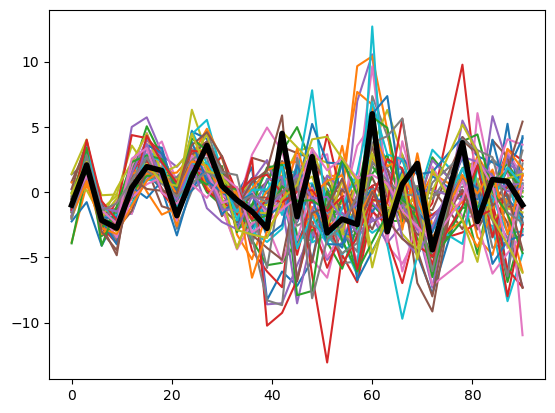

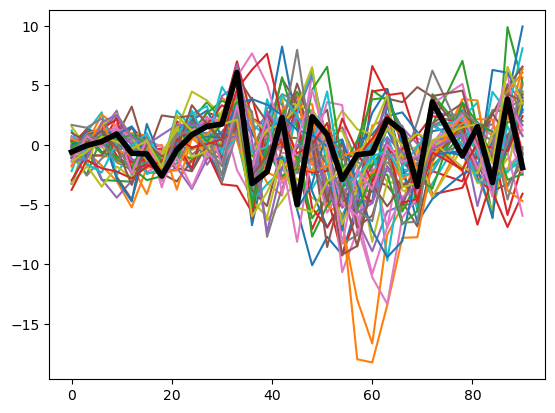

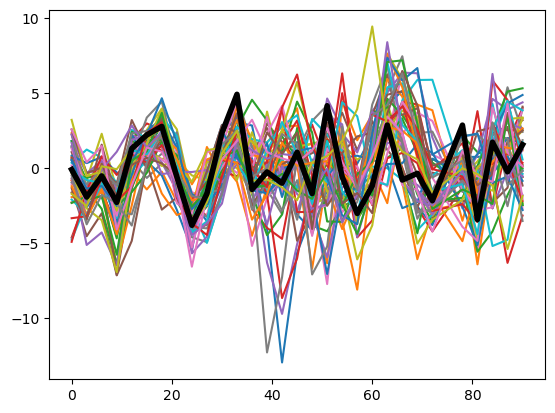

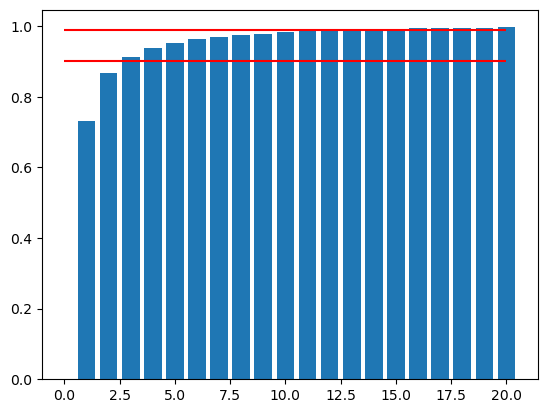

In [6]:
from sklearn.decomposition import PCA
import pandas as pd

nPCAc = 20
Y = ws_ger_cf[:,:,:]
X = Y.reshape(Y.shape[0], -1)
pca = PCA(n_components=nPCAc)
principalComponents_cf = pca.fit_transform(X)

PCarray = np.empty((nPCAc, 50, len(step)))
PCarray[:,:,:] = 0.

for i in range(1,50):
    Y = ws_ger[i,:,:,:]
    X = Y.reshape(Y.shape[0], -1)

    principalComponents = pca.transform(X)

    principalDf = pd.DataFrame(data = principalComponents, columns=list(range(1, nPCAc+1)))
    #         , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])


#plt.figure()
#plt.bar(np.linspace(1,pca.n_components_,pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
#plt.hlines(xmin = 0, xmax = 10,y=0.9)
#plt.show()


#for loc0 in range(principalComponents.shape[1]):
    for j in range(nPCAc):
        plt.figure(j+1)
        plt.plot(step,principalComponents[:500,j])#,color='b')
        for k in range(len(step)):
            PCarray[j,i,k] = principalComponents[k,j] #nPCAc, nEns, step


for i in range(nPCAc):
    plt.figure(i+1)
    plt.plot(step,principalComponents_cf[:500,i],color='black',linewidth=4)


plt.figure(nPCAc+1)
plt.bar(np.linspace(1,pca.n_components_,pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
plt.hlines(y = 0.9,xmin= 0, xmax = 20,colors="red")
plt.hlines(y = 0.99,xmin= 0, xmax = 20,colors="red")
plt.show()

(array([ 1.,  1.,  1.,  8.,  7., 10.,  8.,  9.,  3.,  2.]),
 array([-1.44617915, -0.96686749, -0.48755584, -0.00824418,  0.47106748,
         0.95037913,  1.42969079,  1.90900245,  2.3883141 ,  2.86762576,
         3.34693742]),
 <BarContainer object of 10 artists>)

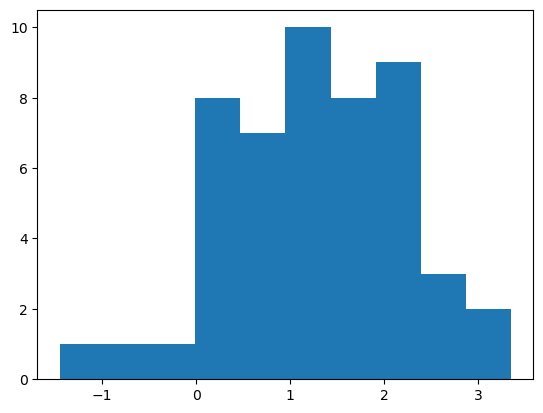

In [14]:
plt.hist(PCarray[19,:,5]) #nPCAc, nEns, step

In [55]:
data = ecdata.read("data.grib2")
data.describe('u')

In [64]:
u = data.select(shortName='u', step=24).sort()
v = data.select(shortName='v', step=24).sort()

speed = ecdata.speed(u,v)
speed.describe()

In [65]:
print(speed)



Fieldset (50 fields)


In [66]:
u_test = data.select(shortName='u').sort()
u_test.ls()

print(u)

Fieldset (50 fields)


In [69]:
mask = ecdata.Fieldset()
mask2 = ecdata.Fieldset()
for number in range(51):
    speed_n = speed.select(number = number,)
    m = (speed_n > 15) 
    mask.append(m)
    m2 = (speed_n > 25) 
    mask2.append(m2)

prob = (ecdata.mean(mask))*100
prob2 = (ecdata.mean(mask2))*100

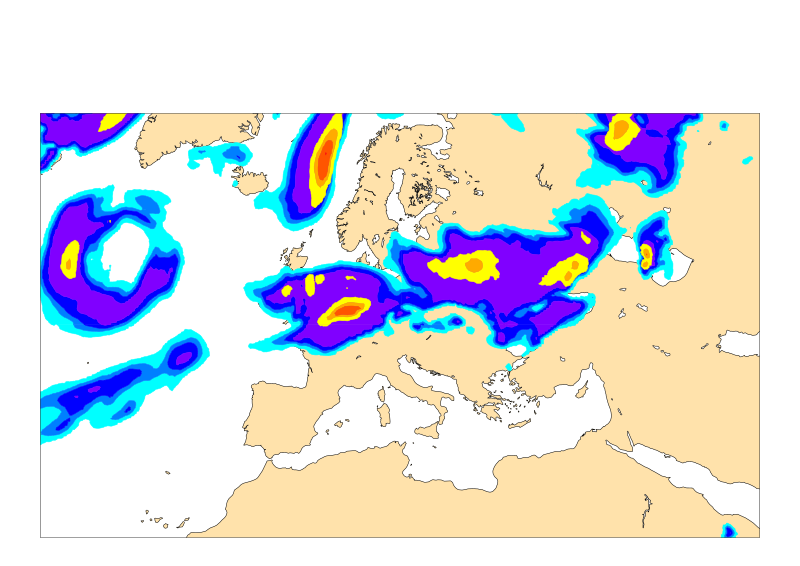

In [70]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")
fig.contour_shaded(prob, style="probability_blue")
fig.contour_shaded(prob2, style="probability_red")


fig.show()